# Assignment (Phase 2)

### Group Name : Group 30 

### Full Name: Kaushik Sunil Anagarkar 

### Student number : s3827495

## <span style="color: #0099cc;">Table of Contents
- [Introduction](#1) <br/>
    * [Report Overview](#2) <br/>
    * [Overview of Methodology](#3) <br/>
- [Predictive Modelling](#4) <br/>
    * [Feature Selection](#5)<br/>
    * [Model Fitting & Tuning](#6)<br/>
    * [Model Comparison](#7) <br/>
- [Critique & Limitations](#8)<br/> 
- [Summary and Conclusions](#9) <br/>
    * [Project Summary](#10) <br/>
    * [Summary of Findings](#11) <br/>
    * [Conclusions](#12) <br/>
- [References](#13) <br/>

# <span style="color: #0099cc;"> Introduction <a class="anchor" id="1"></a>

## <span style="color: #0099cc;"> Report Overview <a class="anchor" id="2"></a> 
    
    
The objective of this report is to predict whether a patient is likely to get stroke using the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient
The dataset is sourced from Kaggle Stroke Prediction Dataset
Stroke Prediction Dataset. (2021). Retrieved 2 June 2021, from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset .

The descriptive features include 4 Nominal Categorical, 3 Numerical ,3 Binary and Ordinal categorical features .
The target features have two classes defined as **0** and **1** .
The dataset is cleaned in the **Phase 1** and the Cleaned Dataset has **4259** observations.
This report is organized as follows:
    
* **Overview of Methodology** -outlines our methodology
* **Feature Selection** -selection of best features to predict the model 
* **Model Fitting & Tuning** -describes the model fitting and tuning process for each classification algorithm.
* **Model Comparison** -presents model performance comparison results.
* **Critique & Limitations** -discusses a limitations of our approach and possible solutions.
* **Summary and Conclusions**- provides a brief summary of our work in this project.

##  <span style="color: #0099cc;">Overview of Methodology <a class="anchor" id="3"></a> 
    
    
The following classifiers are used to predict binary target feature( __stroke__):<br/>
Model 1: K-Nearest Neighbors (KNN)<br/>
Model 2: Decision trees (DT)<br/>
Model 3: Gaussian Naive Bayes<br/>
    
Data cleaning process included dropping off the Missing values and Outliers.Predictive modeling process starts by encoding the categorical descriptive features as numerical and scaling all descriptive features using Min-Max Scaler.Due to imbalanced dataset we oversampled our Data and target features using RandomOverSampler.Next stage was to select the best features to improve accuracy using Random Forest Importance method. library.For model training and testing, the data set is split into 70:30 ratio respectively.Training data has 4906 observations used for model fitting and hyperparameter tuning section and test data has 2103 observations used for model comparison among the 3 classifiers mentioned above.

Grid-search is performed for the best features selected from the Random Forest Importance method over each classifier.For each model 5-fold RepeatedKFold with 3 repetitions  cross-validation evaluation method is applied on the training data using accuracy metric. 
Aim is to accurately predict whether the patient is likely to get stroke (0: patient had no stroke , 1: patient had stroke).
    
Best hyperparameters are estimated for each model using the training data,then the model with these hyperparameters are fit on the test data using 10-fold RepeatedKFold cross-validation .
Each classifier is compared with respect to corresponding metric scores and confusion matrices on test data to find the appropriate model for the data set.Further,to find whether the performance difference is statistically significant, paired t-tests are performed.

Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

pd.set_option('display.max_columns', None) 

* The Given dataset is **Cleaned_Data.csv** is imported into pandas using <code>read_csv()</code> function 

In [2]:
#import cleaned data 
stroke =pd.read_csv('Cleaned_Data.csv')
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [3]:
stroke.shape

(4259, 11)

Creating **Data** feature from the **stroke** dataset by dropping off the **stroke** column and **target** feature by selecting the **stroke** column from the diamonds dataset.

In [4]:
#Create Data feature and target features
Data = stroke.drop(columns='stroke')
target=stroke['stroke']

In [5]:
#shape of Data feature
Data.shape

(4259, 10)

In [6]:
#shape of target feature
target.shape

(4259,)

Create a list **catgeorical** columns of the Data feature

In [7]:
# creating a list categorical columns of the stroke dataset
categorical_columns = Data.columns[Data.dtypes == object].tolist() 
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

### One-Hot Encoding 

If the **categorical** columns of the Data features are **binary** categorical columns then we do not need the seperate columns so we drop the column after performing **one-hot encoding** using <code>get.dummies()</code> function.

In [8]:
#one-hot encoding for the binary categorical columns 
for name in categorical_columns:
    length = len(Data[name].unique())
    if length == 2:
        Data[name] = pd.get_dummies(Data[name], drop_first=True)
Data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked
1,1,74.0,1,1,1,Private,0,70.09,27.4,never smoked
2,0,69.0,0,0,0,Private,1,94.39,22.8,never smoked
3,0,78.0,0,0,1,Private,1,58.57,24.2,Unknown
4,0,81.0,1,0,1,Private,0,80.43,29.7,never smoked


Performing **one-hot encoding** for **categorical** columns with more than **two levels** of the diamonds dataset.

In [9]:
#one-hot encoding for the categorical columns with more than 2 levels
Data = pd.get_dummies(Data)
Data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0
1,1,74.0,1,1,1,0,70.09,27.4,0,0,1,0,0,0,0,1,0
2,0,69.0,0,0,0,1,94.39,22.8,0,0,1,0,0,0,0,1,0
3,0,78.0,0,0,1,1,58.57,24.2,0,0,1,0,0,1,0,0,0
4,0,81.0,1,0,1,0,80.43,29.7,0,0,1,0,0,0,0,1,0


## Scaling the Data Features 

* <code>MinMaxScalar()</code> is used  for scaling the descriptive features 

In [10]:
#Scale the Data features
from sklearn import preprocessing
Data_unscaled=Data.copy()
Data = preprocessing.MinMaxScaler().fit_transform(Data)
Data.shape

(4259, 17)

In [11]:
Data_unscaled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

Checking the **levels** of the target feature

In [12]:
target.value_counts()

0    4123
1     136
Name: stroke, dtype: int64

* The target feature is **imbalanced** which would lead to **bad model prediction** . 
* In order to have our model give better prediction we can oversample(increasing the sample size) our **Data** and **target** feature using <code>RandomOverSampler</code>  library
* Import <code>Counter</code> to check the count of the classes of feature

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [14]:
print(Counter(target))

Counter({0: 4123, 1: 136})


* Fit the Scaled Data feature **Data** and **target** feature to the <code>RandomOverSampler</code> model with **0.7 sampling strategy**
* Use <code>Counter()</code> function to check the classes of the **oversampled target** features

In [15]:
# instantiating the random undersampler
ros = RandomOverSampler(sampling_strategy=0.7) 

# resampling X, y
Data, target_ros = ros.fit_resample(Data,target)

# new class distribution
print(Counter(target_ros))

Counter({0: 4123, 1: 2886})


* Now the **Oversampled** dataset consistts of **7009** observations 
* Note the updated shape of **Data** and **target** feature using `shape` function 

In [16]:
Data.shape

(7009, 17)

In [17]:
target_ros.shape

(7009,)

* Saving the oversampled numpy array **Data** into a dataframe named **Data** for further manipulation.
* Displaying the 5 sampled observations to verify if all the features are being scaled 

In [18]:
#Create dataframe of scaled dataframe 
Data = pd.DataFrame(Data,columns=Data_unscaled.columns)
Data.sample(5,random_state=999)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2878,1.0,0.987793,0.0,1.0,1.0,0.0,0.116341,0.395161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4563,0.0,0.682617,0.0,0.0,1.0,0.0,0.947625,0.456989,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1378,0.0,0.731445,0.0,0.0,1.0,0.0,0.060338,0.473118,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1904,0.0,0.975586,0.0,1.0,1.0,0.0,0.382819,0.319892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2470,1.0,0.633789,0.0,0.0,1.0,1.0,0.286561,0.543011,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# <span style="color: #0099cc;">Predictive Modelling <a class="anchor" id="4"></a> 

## <span style="color: #0099cc;">Feature Selection <a class="anchor" id="5"></a> 
    
 

* **Random Forest Importance(RFI)** is used to select the 10 most important features in the **stroke** dataset .
* Plotting the **importance percentage** of all the best features

In [19]:
from sklearn.ensemble import RandomForestClassifier

num_features=10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target_ros)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [20]:
fs_indices_rfi

array([ 1,  6,  7,  2,  4,  5,  0, 11, 15, 13], dtype=int64)

In [21]:
best_features_rfi = Data.columns[fs_indices_rfi].values
best_features_rfi

array(['age', 'avg_glucose_level', 'bmi', 'hypertension', 'ever_married',
       'Residence_type', 'gender', 'work_type_Self-employed',
       'smoking_status_never smoked', 'smoking_status_Unknown'],
      dtype=object)

In [22]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.37590319, 0.17944131, 0.17846418, 0.03621259, 0.03433516,
       0.0262948 , 0.02516187, 0.02007102, 0.01937663, 0.01676797])

In [23]:
def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

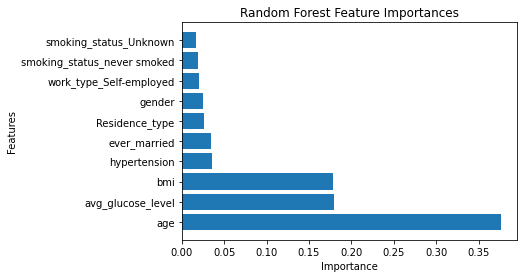

In [24]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

From the above plot, we can suggest that **age** feature has almost **36** percent importance compared to other best 9 features

* Removing all the features except the **10 best features** in the **Data** features

In [25]:
Data= Data.iloc[:,fs_indices_rfi]
Data

,age,avg_glucose_level,bmi,hypertension,ever_married,Residence_type,gender,work_type_Self-employed,smoking_status_never smoked,smoking_status_Unknown
0,0.975586,0.449438,0.596774,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.902344,0.132443,0.459677,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.841309,0.347430,0.336022,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.951172,0.030523,0.373656,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.987793,0.223923,0.521505,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7004,0.902344,0.157834,0.564516,0.0,1.0,1.0,1.0,0.0,0.0,0.0
7005,0.719238,0.556578,0.677419,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7006,0.926758,0.751836,0.526882,0.0,1.0,1.0,1.0,0.0,0.0,0.0
7007,0.987793,0.134301,0.416667,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Train-Test Splitting 

The scaled dataset has **7009 observations** and **10 columns** which is divided into train and test partitions with a 70:30 ratio using stratification on target variable. Shape of trained data and test data is found using `shape` method.

In [26]:
from sklearn.model_selection import train_test_split

D_train,D_test,t_train,t_test=train_test_split(Data,target_ros,test_size=0.3,stratify = target_ros, random_state=999)

In [27]:
D_train.shape

(4906, 10)

In [28]:
D_test.shape

(2103, 10)

In [29]:
t_train.shape

(4906,)

In [30]:
t_test.shape

(2103,)

## <span style="color: #0099cc;">Model Fitting and Tuning <a class="anchor" id="6"></a> 

### Model Evaluation Strategy

* Training and tuning the models on **4906** rows of training data and on **2103** rows of test data.<br/>
* For each model, **5-fold RepeatedKFold** cross-validation evaluation method is applied on the training data.

In [31]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV


cv_method = RepeatedKFold(n_splits=5, 
                          n_repeats=3, 
                          random_state=999)

### Hyperparameter Tuning 

#### K-Nearest Neighbors (KNN)

* A grid search is performed for **10 best features** over the following KNN hyperparameters: 
    * **Number of neighbors** - <code>1, 2, 3, 4, 5, 6, 7</code>
    * **Distance metric (p)** - <code>1,2,5</code> 
<br/>

In [32]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]
              
            }

* The **KNN model** is fit and it's **hyperparameters** are optimised using the grid search.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [34]:
gs_KNN.fit(D_train,t_train)

Fitting 15 folds for each of 21 candidates, totalling 315 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2, 5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [35]:
gs_KNN.best_params_

{'n_neighbors': 1, 'p': 1}

The best performing parameter combination are found using `best_params_`.
  * **Number of neighbors** &nbsp;<code>1</code>
  * **Distance metric** &nbsp;<code>2</code> which is Manhattan distance

In [36]:
gs_KNN.best_score_

0.9745210596721277

* We can say that the optimal **KNN model** has a <b>accuracy</b> score of **0.9720**.
* The best performing **KNN** for 10 features with **1 nearest neighbors** and  p=2 , which is the **Euclidean distance**.

In [37]:
gs_KNN.cv_results_['mean_test_score']

array([0.97452106, 0.97377325, 0.97302585, 0.97452106, 0.97377325,
       0.97302585, 0.94836309, 0.94999339, 0.94843071, 0.94822718,
       0.94985748, 0.94829479, 0.92539735, 0.92614433, 0.92811428,
       0.92505756, 0.92580454, 0.92777449, 0.9066443 , 0.90820643,
       0.90827425])

* Creating a **dataframe** with **parameters** by combining <code>gs.cv_results_['params']</code> and <code>gs.cv_results_['mean_test_score']</code>. The <code>gs.cv_results_['params']</code> is an array of hyperparameter combinations 

In [38]:
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])

In [39]:
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']

* Create a new column named **metric** that stores the name of the metric for each  p  value.

In [40]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,1,1,0.974521,Manhattan
1,1,2,0.973773,Euclidean
2,1,5,0.973026,Minkowski
3,2,1,0.974521,Manhattan
4,2,2,0.973773,Euclidean
5,2,5,0.973026,Minkowski
6,3,1,0.948363,Manhattan
7,3,2,0.949993,Euclidean
8,3,5,0.948431,Minkowski
9,4,1,0.948227,Manhattan


* **Visualize** the results of **KNN model** grid search using the <code>matplotlib</code> module.

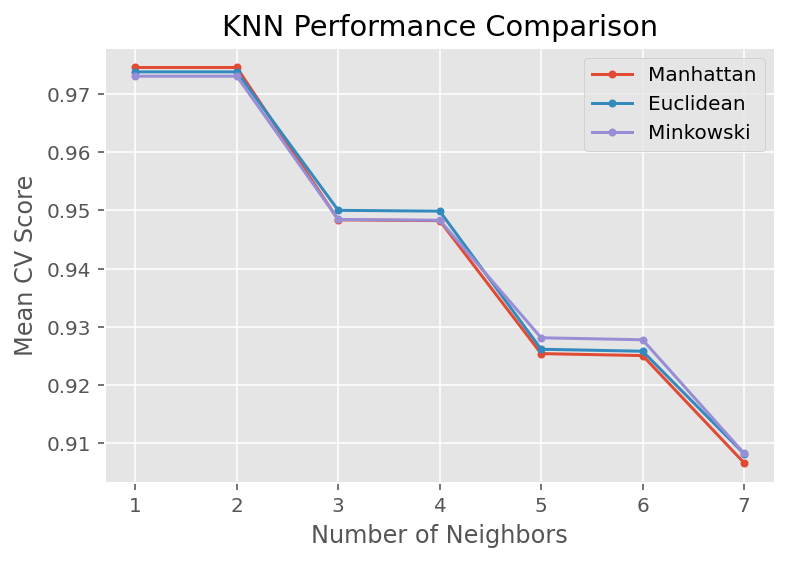

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

* The **plot**  shows that **K = 1** with the **Euclidean distance metric (p=1)** is better than other combinations.

### Decision Tree 

* A grid search is performed for **10 best features** over the following Decision Tree hyperparameters: 
    * **split criterion** - <code>Entropy , Gini</code>
    * **maximum depth** - <code>1, 2, 3, 4, 5, 10, 15</code>
    * **minimum samples split** - <code>2, 3</code> 
    
* The decision tree model is fit and its hyperparameters are optimised using the grid search.

In [42]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]
            }

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(D_train, t_train);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [43]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

* The best performing **Decision tree** model has hyperparameters combination as follows:
    * **split criterion** - <code>gini</code> 
    * **maximum depth** - <code>8</code>
    * **minimum samples split** - <code>2</code>

In [44]:
gs_DT.best_score_

0.8813684029140223

* We can say that the optimal **Decision Tree model** has a <b>accuracy</b> score of **0.8798**.
* The optimal value is obtained for 10 features with **gini** split criterion  **maximum depth =2** and **minimum samples split =2**.


* Create new **data frame** to store the **Decision tree** grid search results for visualization.

In [45]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'min_samples_split', 'test_score'], dtype='object')

* **Visualize** the results of decision tree grid search using the <code>matplotlib</code> module for split criterionn **Gini** and **Entropy**.

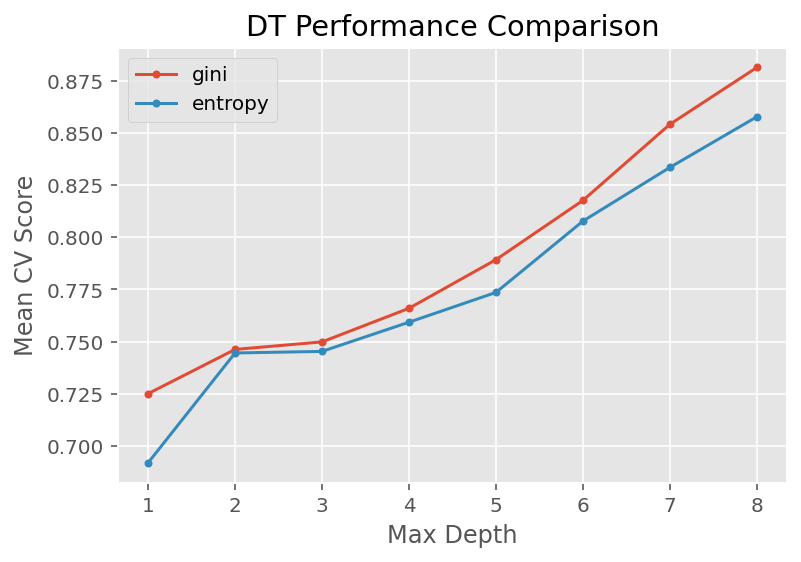

In [46]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

* We can observe that **gini** will give better mean CV score results than **entropy** split criterion.

### Naive Bayes 

Trained data is transformed using the <b>power transformation</b> on each feature to make it more or less normally distributed as Gaussian Naive Bayes Model requires each descriptive features follow a normal distribution.

* A grid search is performed for 10 best features over the following over the following Naive Bayes hyperparameter
    * **Var smoothing** - From <code>10</code> to <code>10<sup>−6</sup></code> with `100` different values.


In [47]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

np.random.seed(999)

sample_size = 1000
x_exponential = np.random.exponential(2, sample_size).reshape(-1, 1)
x_transformed = PowerTransformer().fit_transform(x_exponential)

df1 = pd.DataFrame(x_exponential)
df1['distribution'] = 'exponential'

df2 = pd.DataFrame(x_transformed)
df2['distribution'] = 'transformed'

# combine the two data frames into one to be used for plotting
df = pd.concat([df1, df2], axis=0)
df.rename(columns={0: 'x'}, inplace=True)

print(df.sample(n=10))

            x distribution
342 -0.276524  transformed
321  3.216755  exponential
247  1.297923  transformed
514 -1.678249  transformed
343  0.204341  exponential
386  0.486638  exponential
304  0.883091  exponential
772  0.015391  exponential
889  0.184597  transformed
554  0.076667  exponential


* **Power transformed** numbers are centered at 0 and their distribution look like **bell-curved**

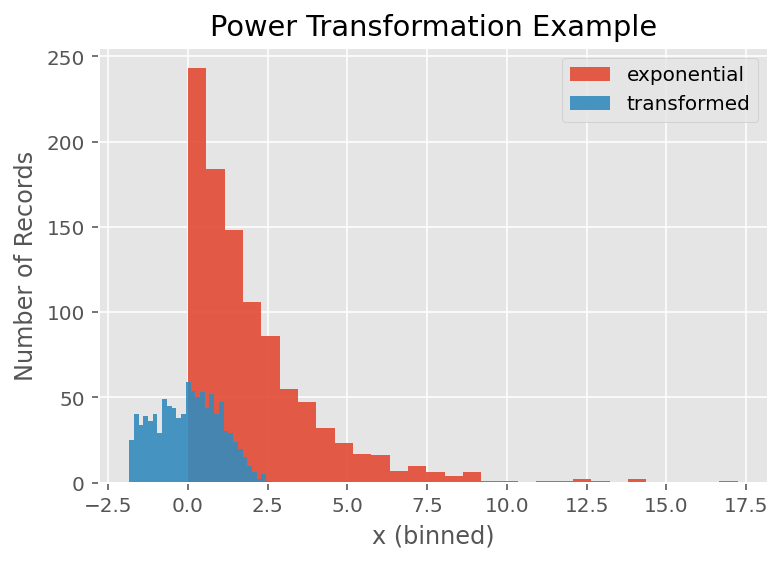

In [48]:
for i in ['exponential', 'transformed']:
    temp = df[df['distribution']==i]
    plt.hist(temp['x'], alpha = 0.9, bins =30, label = i)

plt.xlabel('x (binned)')
plt.ylabel('Number of Records')
plt.title('Power Transformation Example')
plt.legend()
plt.show()

In [49]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

* The **Gaussian Naive Bayes Model** model is fit and it's **hyperparameters** are optimised using the grid search.

In [50]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(D_train)

gs_NB.fit(Data_transformed, t_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [51]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [52]:
gs_NB.best_score_

0.7185772031116675

* We can say that the optimal **Gaussian Naive Bayes model** has a <b>accuracy</b> score of **0.7227**.
* The optimal value is obtained with **var_smoothing** valued **0.00231**.

* Create new **data frame** to store the **Gaussian Naive Bayes** model grid search results for visualization.

In [53]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

* **Visualize** the results of Naive Bayes grid search using the <code>matplotlib</code> module

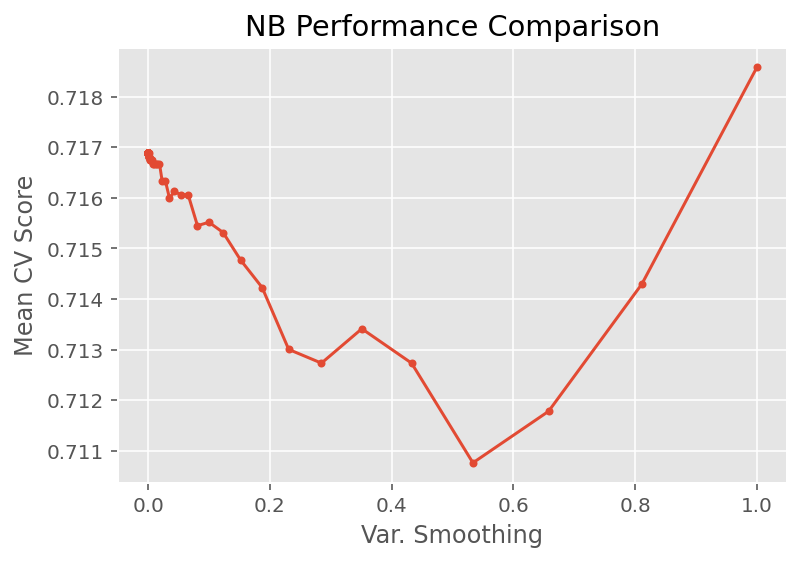

In [54]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

We observe that the best **variance smoothing** parameter for NB is **0.002** with highest Mean CV score

## <span style="color: #0099cc;">Model Comparison <a class="anchor" id="7"></a> 

* Hyperparameter tuned model is fit on the test data with 2103 observations using <code>cross_val_score()</code> function
* 10 fold RepeatedKFold cross-validation technique is used with **random_state** to 111
* Performance of each model on test data is predicted 

### Cross-Validation on KNN Best Estimator 

In [55]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.9519057234529827

### Cross-Validation on Gaussian Naive Bayes Best Estimator 

In [56]:
D_test_transformed = PowerTransformer().fit_transform(D_test)

cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                X=D_test_transformed,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.8088005763892953

### Cross-Validation on Decision Tree Best Estimator 

In [57]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                X=D_test,
                                y=t_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.9127628858485427

### Paired t-test 

* Paired t-tests is performed using `stats.ttest_rel` method from **Scipy** module.
* After performing Model Comparison on test data, Cross validation scores of each model is noted.
* **KNN** performed the best followed by **Decision Tree** Classifier. 
* **Gaussian Naive Bayes** performed the least.
* To verify if there is any statistical difference between the any two tuned classifiers a pairwise t-test is performed.

      1)NB vs. KNN  
      2)KNN vs. DT


In [58]:
from scipy import stats
print('Paired ttest: Gaussian Naive Bayes Vs KNN classifier ')
print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print('\nPaired ttest: KNN Vs Decision Tree classifier ')
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))


Paired ttest: Gaussian Naive Bayes Vs KNN classifier 
Ttest_relResult(statistic=56.11649318366934, pvalue=7.381742738624422e-77)

Paired ttest: KNN Vs Decision Tree classifier 
Ttest_relResult(statistic=-21.006788499036936, pvalue=2.918231418755156e-38)


* The paired t-test results have p-values less than 0.05 that indicates that the test is statistically significant different
* We can conclude that **at a 95% significance level, KNN performs better than other classifiers and is statistically the best model (in terms of accuracy) when compared on test data**

### Evaluation metrics  

* **Model Evaluation** can also be done by parameters like accuracy ,precision ,recall ,F1 Score using <code>classification_report</code> function 
* The `accuracy`metric was used to optimize the algorithm hyperparameters and all other parameters are used to evaluate the model based on test data .
* Different performance metric for the model can be calculated using metrics module 
* <code>confusion_matrxi</code> to check the number of times model predicted the right target level.

In [59]:
t_pred_KNN = gs_KNN.predict(D_test)
t_pred_DT = gs_DT.predict(D_test)
t_pred_NB = gs_NB.predict(D_test)

In [60]:
from sklearn.metrics import classification_report
print("\nClassification report for K-Nearest Neighbor")
report_KNN =classification_report(t_test,t_pred_KNN)
print(report_KNN)
print("\nClassification report for Decision Tree")
report_DT =classification_report(t_test,t_pred_DT)
print(report_DT)
print("\nClassification report for Naive Bayes")
report_NB =classification_report(t_test,t_pred_NB)
print(report_NB)



Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1237
           1       0.95      1.00      0.97       866

    accuracy                           0.98      2103
   macro avg       0.97      0.98      0.98      2103
weighted avg       0.98      0.98      0.98      2103


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1237
           1       0.78      0.97      0.86       866

    accuracy                           0.87      2103
   macro avg       0.88      0.89      0.87      2103
weighted avg       0.89      0.87      0.88      2103


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.95      0.39      0.55      1237
           1       0.53      0.97      0.68       866

    accuracy                           0.63      2103
  

* We can infer that **KNN** model has the best accuracy score ,precision ,recall and f1 score followed by **Decision tree** classifier.

In [61]:
from sklearn.metrics import confusion_matrix
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test, t_pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(t_test, t_pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, t_pred_DT))


Confusion matrix for K-Nearest Neighbor
[[1188   49]
 [   0  866]]

Confusion matrix for Naive Bayes
[[480 757]
 [ 23 843]]

Confusion matrix for Decision Tree
[[1001  236]
 [  28  838]]


* TPR rate of **KNN** model is much higher compared to other models 
* FPR rate of **Gausian Naive Bayes** model is higher compared to other models 
* The confusion matrix revealed that **KNN** was able to predict most number of stroke prediction accurately by out performing other classifiers.

# <span style="color: #0099cc;">Critique & Limitations <a class="anchor" id="8"></a> 

* The  Black-box approach was followed in this process the data goes in, decisions come out, but the processes between input and output are not known.
* More detailed analysis of feature ranking and selection on taking number of parameters could have been performed .
* RFI method could have been replaced by wrapper-based feature selection method such as SPSA which has better performance.
* In addition, further fine tuning can be performed by taking other parameters into considerations 
* The second best performer model Decision Tree could be further improved by expanding its hyperparameter by further fine tuning because Decision tree perform better for both numerical and categorical features.
* OverSampling method does not give the real observation instead the dataset is oversampled to give better prediction of model instead of real-time measured observations.
* Using RepeatedKFold validation over StratifiedKFold gave us better predictions of the GridSearch results.


# <span style="color: #0099cc;">Summary and Conclusions <a class="anchor" id="9"></a> 

## <span style="color: #0099cc;">Project Summary <a class="anchor" id="10"></a> 

* Phase 1 stressed more Data Cleaning and Preprocessing which included Handling missing values ,outliers and removing constant features
* Data Exploration process helped to get insights from the relationships between the features 
* Predictive Modelling involved in finding the best features ,best hyperparameters to classifiers and best model to fit the data features to estimate better predictions .
* Feature Selection & ranking used to find the 10 best features with more importance percentage 
* Grid-search is performed for the best features selected from the Random Forest Importance method over each classifier.
* For each model 5-fold RepeatedKFold with 3 repetitions cross-validation evaluation method is applied on the training data using accuracy metric.
* Model with best hyperparameters are fit on the test data using 10-fold RepeatedKFold cross-validation.
* Models are evaluated using metrics and paired t-test to estimate the best model with better accuracy.
* The accuracy obtained during hyperparameter tuning when applied on trained data and cross-validation on test data is highest in KNN.
* The paired ttest also revealed that the difference in accuracy scores were statistically different when checked on KNN.

##  <span style="color: #0099cc;"> Summary of Findings: <a class="anchor" id="11"></a> 

* Data Cleaning involved in removing constant feature like **id** , dropping off the **missing values** in **bmi** feature ,removing the **outliers** in **bmi** and **avg_glucose_level** features
* Data exploration gave insights about male being more likely to have stroke than female ,and 75% of patients with age group 75-80 are more likely to have stroke and more than 50% with hypertension and between age group 70-75 are more likely to have stroke.
* Feature ranking and selection method suggests the **age** feature has more than 35% importance percent compared followed by **avg_glucose_level** feature
* Some of the hypothesis made by me being **bmi** and **avg_glucose_level** features to have more important percent which was wrong when RFI method for feature ranking and selection was used which predicted the **age** feature to have more importance percent.



##   <span style="color: #0099cc;">Conclusions <a class="anchor" id="12"></a>  

* **Age** feature was the best feature in predicting the stroke 
* Since the dataset was imbalanced we oversampled the dataset to have better predictions which means the oversampled dataset did have real-time measured observations.
* **KNN** is the best model for predicting whether the patients would get heart stroke with 95% accuracy.
* Computational time for fitting the model with **KNN** is more than other classifiers

# <span style="color: #0099cc;">References <a class="anchor" id="13"></a> 
    
* Stroke Prediction Dataset
 Stroke Prediction Dataset. (2021). Retrieved 2 June 2021, from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 
    
* Oversampling and Undersampling
 Oversampling and Undersampling. (2020). Retrieved 2 June 2021, from https://towardsdatascience.com/oversampling-and-      undersampling-5e2bbaf56dcf

* Machine Learning Tutorials | www.featureranking.com
 Machine Learning Tutorials | www.featureranking.com. (2021). Retrieved 2 June 2021, from  https://www.featureranking.com/tutorials/machine-learning-tutorials/    
